<a href="https://colab.research.google.com/github/Rioba-Ian/Statistics/blob/main/Gravity_TradeVolume_GDP_and_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [18]:
from google.colab import files 
uploaded = files.upload()

Saving data - data.csv to data - data.csv


In [19]:
data = pd.read_csv('data - data.csv')
data.head(2)

,Unnamed: 0,import,export,Gdp,Distance
0,Afghanistan,9.0,NaN,19.0,NaN
1,Albania,1.0,0.0,13.0,9424.0


In [20]:
data.columns.values

array(['Unnamed: 0', 'import', 'export', 'Gdp', 'Distance'], dtype=object)

In [21]:
data['Countries'] = data['Unnamed: 0']
data.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
data.head(2)

,import,export,Gdp,Distance,Countries
0,9.0,NaN,19.0,NaN,Afghanistan
1,1.0,0.0,13.0,9424.0,Albania


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   import     202 non-null    float64
 1   export     192 non-null    float64
 2   Gdp        192 non-null    float64
 3   Distance   190 non-null    float64
 4   Countries  208 non-null    object 
dtypes: float64(4), object(1)
memory usage: 8.2+ KB


In [24]:
data.describe()

,import,export,Gdp,Distance
count,202.000000,192.000000,192.000000,190.000000
mean,1157.396040,1514.296875,423.052083,9974.457895
std,4401.201239,5245.507187,1750.892693,4622.714241
min,0.000000,0.000000,0.000000,316.000000
25%,4.000000,1.000000,7.750000,6968.000000
50%,25.500000,16.500000,36.500000,9499.000000
75%,261.750000,320.500000,219.500000,12291.250000
max,37688.000000,46233.000000,19543.000000,19747.000000


In [35]:
data['Distance'] = data['Distance'].fillna((data['Distance'].median()))
data['import'] = data['import'].fillna((data['import'].median()))
data['export'] = data['export'].fillna((data['export'].median()))
data['Gdp'] = data['Gdp'].fillna((data['Gdp'].median()))


In [36]:
data.head(2)

,import,export,Gdp,Distance,Countries,Volume
0,9.0,1514.296875,19.0,9974.457895,Afghanistan,1523.296875
1,1.0,0.000000,13.0,9424.000000,Albania,1.000000


In [71]:
data['Volume'] = data['export'] + data['import']

In [72]:
data.head(5)

,import,export,Gdp,Distance,Countries,Volume,lnVolume,lnGdp
0,9.0,1514.296875,19.0,9974.457895,Afghanistan,1523.296875,7.328632,2.944439
1,1.0,0.000000,13.0,9424.000000,Albania,1.000000,0.000000,2.564949
2,54.0,334.000000,167.0,10895.000000,Algeria,388.000000,5.961005,5.117994
3,17.0,0.000000,36.5,9974.457895,American Samoa,17.000000,2.833213,3.597312
4,471.0,274.000000,122.0,10105.000000,Angola,745.000000,6.613384,4.804021


In [88]:
data['lnVolume'] = np.log(data['Volume'] + 10)
data['lnGdp'] = np.log(data['Gdp']+10)
data.head(5)

,import,export,Gdp,Distance,Countries,Volume,lnVolume,lnGdp
0,9.0,1514.296875,19.0,9974.457895,Afghanistan,1523.296875,7.335176,3.367296
1,1.0,0.000000,13.0,9424.000000,Albania,1.000000,2.397895,3.135494
2,54.0,334.000000,167.0,10895.000000,Algeria,388.000000,5.986452,5.176150
3,17.0,0.000000,36.5,9974.457895,American Samoa,17.000000,3.295837,3.839452
4,471.0,274.000000,122.0,10105.000000,Angola,745.000000,6.626718,4.882802


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   import     208 non-null    float64
 1   export     208 non-null    float64
 2   Gdp        208 non-null    float64
 3   Distance   208 non-null    float64
 4   Countries  208 non-null    object 
 5   Volume     208 non-null    float64
 6   lnVolume   208 non-null    float64
 7   lnGdp      208 non-null    float64
dtypes: float64(7), object(1)
memory usage: 14.6+ KB


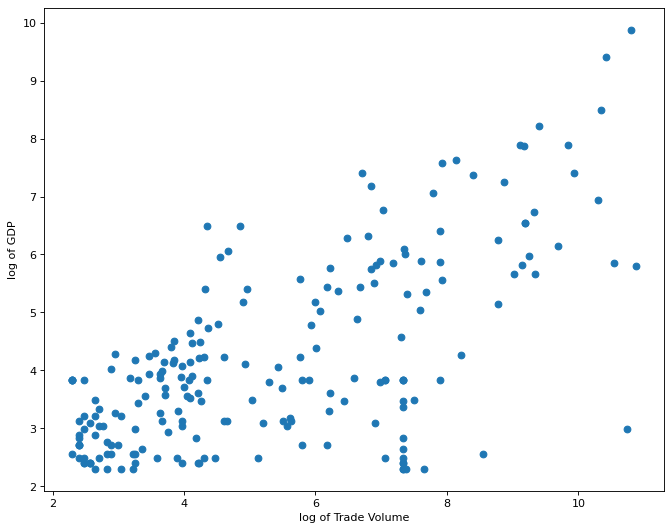

In [94]:
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(data['lnVolume'], data['lnGdp'])
plt.xlabel('log of Trade Volume')
plt.ylabel('log of GDP')
plt.show()

In [90]:
df = data.dropna()

In [91]:
df.head(5)

,import,export,Gdp,Distance,Countries,Volume,lnVolume,lnGdp
0,9.0,1514.296875,19.0,9974.457895,Afghanistan,1523.296875,7.335176,3.367296
1,1.0,0.000000,13.0,9424.000000,Albania,1.000000,2.397895,3.135494
2,54.0,334.000000,167.0,10895.000000,Algeria,388.000000,5.986452,5.176150
3,17.0,0.000000,36.5,9974.457895,American Samoa,17.000000,3.295837,3.839452
4,471.0,274.000000,122.0,10105.000000,Angola,745.000000,6.626718,4.882802


In [92]:
df.describe()

,import,export,Gdp,Distance,Volume,lnVolume,lnGdp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,1157.396040,1514.296875,393.317308,9974.457895,2671.692915,5.371743,4.202831
std,4336.946678,5038.705751,1685.031104,4417.156404,7827.780869,2.313070,1.602054
min,0.000000,0.000000,0.000000,316.000000,0.000000,2.302585,2.302585
25%,4.000000,1.000000,10.000000,7290.000000,21.500000,3.449601,2.995732
50%,27.500000,26.500000,36.500000,9865.000000,96.000000,4.663395,3.839452
75%,370.750000,672.000000,203.250000,11708.000000,1514.296875,7.329289,5.362463
max,37688.000000,46233.000000,19543.000000,19747.000000,52969.000000,10.877651,9.880884


In [110]:
import statsmodels.api as sm

x = df['lnGdp']
y = df['lnVolume']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing='drop').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               lnVolume   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     151.5
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.84e-26
Time:                        08:09:26   Log-Likelihood:                -411.72
No. Observations:                 208   AIC:                             827.4
Df Residuals:                     206   BIC:                             834.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4212      0.343      4.139      0.0

In [95]:
x1 = df['Distance']
y1 = df['lnVolume']

x1 = sm.add_constant(x)

model1 = sm.OLS(y, x, missing='drop').fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  lnGdp   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     151.5
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.84e-26
Time:                        07:45:39   Log-Likelihood:                -335.32
No. Observations:                 208   AIC:                             674.6
Df Residuals:                     206   BIC:                             681.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7807      0.214      8.315      0.0

In [98]:
from statsmodels.formula.api import ols 

plt.rc('figure', figsize=(10,8))
plt.rc('font', size=10)

In [103]:
model3 = ols('lnVolume ~ lnGdp + Distance', data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               lnVolume   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     83.16
Date:                Thu, 13 May 2021   Prob (F-statistic):           3.59e-27
Time:                        07:54:10   Log-Likelihood:                -407.28
No. Observations:                 208   AIC:                             820.6
Df Residuals:                     205   BIC:                             830.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2841      0.444      5.149      0.0

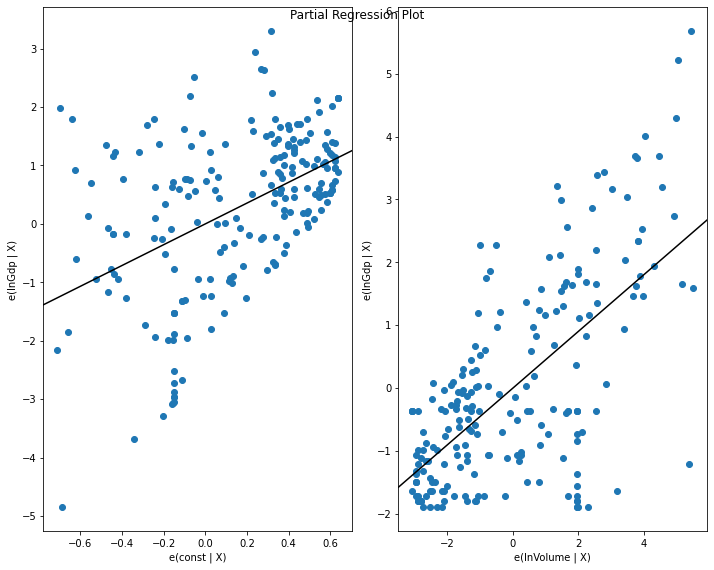

In [108]:
fig = sm.graphics.plot_partregress_grid(model1)
fig.tight_layout(pad=1.0)

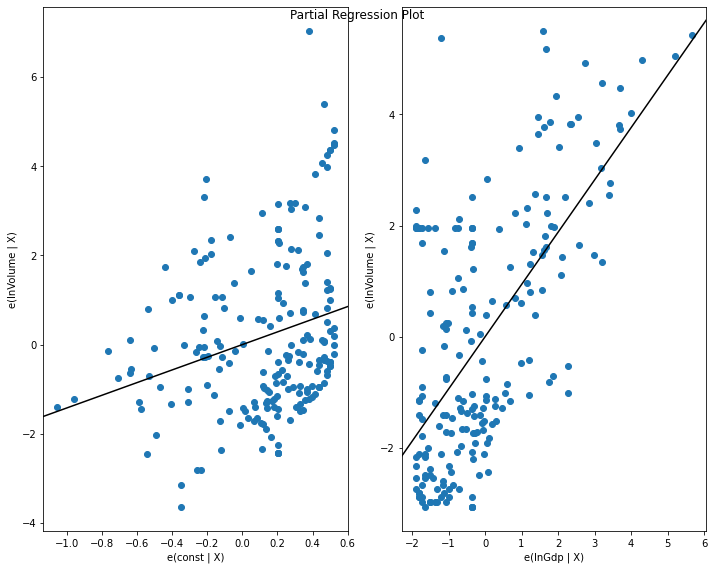

In [111]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

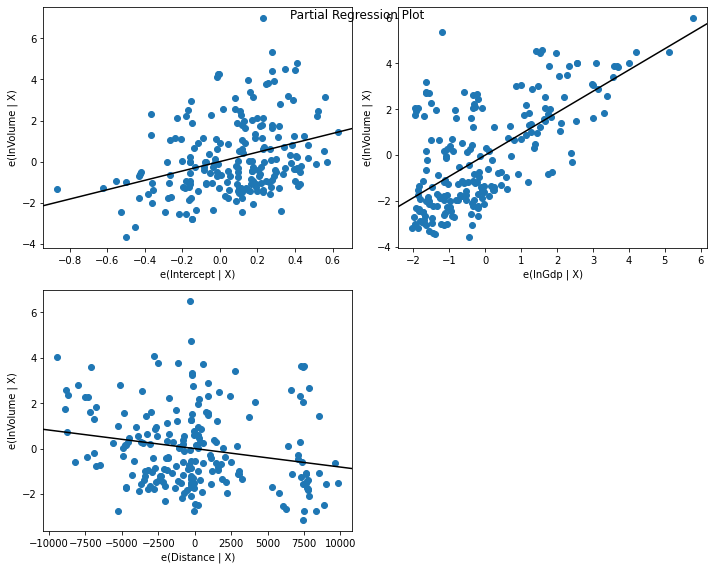

In [112]:
fig = sm.graphics.plot_partregress_grid(model3)
fig.tight_layout(pad=1.0)